# Basic pipeline

**Noam Gini 208375642  
Shai Fisher 315150342**

## Flight fares predictions using the following dataset: [Filght fares](https://www.kaggle.com/datasets/yashdharme36/airfare-ml-predicting-flight-fares)

### Imports of relevant packages

In [312]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

# import warnings
# warnings.filterwarnings("ignore")

## Introducing the Flight fares dataset - Exploratory Data Analysis (EDA)

In [313]:
dtf = pd.read_csv("./data/data_airfare.csv")

In [314]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]

In [315]:
cols = ["Date_of_journey","Journey_day","Airline","Flight_code","Class","Source","Departure","Total_stops",
        "Arrival","Destination", "Duration_in_hours", "Days_left", "Fare"]
dtf = dtf[cols]

**Let's take a look at the data**

In [316]:
dtf.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [317]:
dtf.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


**Note:** The Fare of the flight tickets is in INR  
**1 USD = 82.78 INR**

**Examining the target feature - "Fare" Using Histogram, a KDE plot, and a Box plot**

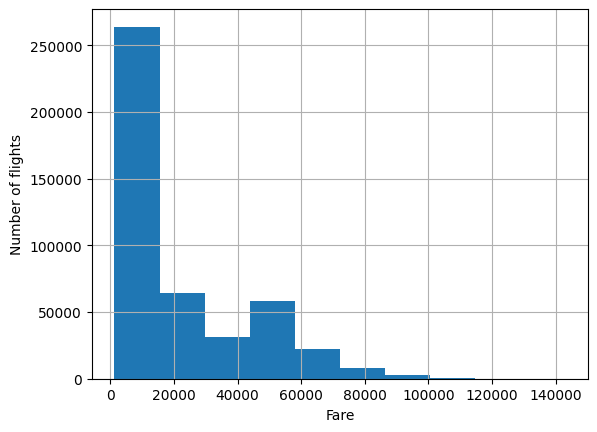

In [318]:
dtf.Fare.hist()

# Add labels to the x and y axes
plt.xlabel('Fare')
plt.ylabel('Number of flights')

# Show the plot
plt.show()

Exploring the tickets fare:
From the description table above the histogram, we learn that the minimum ticket fare is 1,307 INR and maximum is 143,019 INR. There exists a difference in mean and median values as well.  
Now let's visualize the fare column using a kde plot and a box plot.

<Axes: xlabel='Fare', ylabel='Density'>

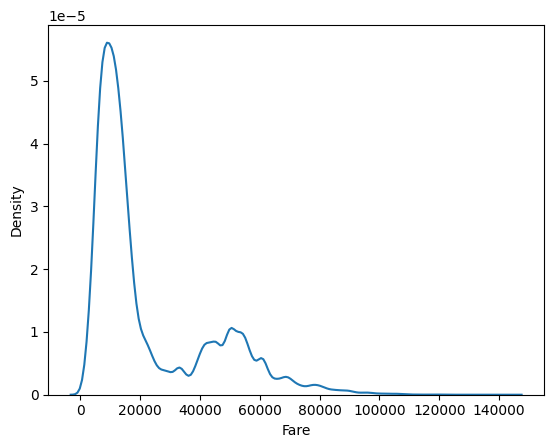

In [319]:
sns.kdeplot(dtf.Fare)

We can see that the data may contains outliers.

Let's examine the outliers

<Axes: xlabel='Fare'>

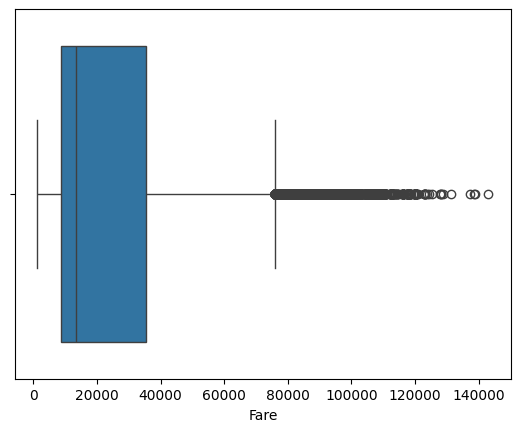

In [320]:
sns.boxplot(dtf.Fare, orient="h")

A Fare outlier is acceptable because there are different ticket classes - Economy, Premium Economy, Business and First class.
Even though the mean is around 20000, we can see that the median is approximately 14000.
In the KDE plot, we can see that the dispersion seems to be composed by two gaussian curves.
The first one - From 1,000 to 30,000 there is one peak, corresponding to the cheap tickets 
The second one - A peak from 40,000 to 80,000 corresponding to the expensive classes tickets.
We have decided not to remove the fare outliers.

## Cleaning and Preprocessing

We will make sure that there are no null values in our data

In [321]:
dtf.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

There are no missing values in our dataset.

Now we will check for duplicates in our data

In [322]:
dtf.duplicated().sum()

6722

There are 6722 duplicated rows, So let's remove them.

In [323]:
dtf = dtf.drop_duplicates()

In [324]:
#check that the duplicates are gone
dtf.duplicated().sum()

0

We will change the 'Days_left' to a more indicitive name

In [325]:
# Change the column  from 'Days_left' to 'Advance_purchase_days' for clearity
dtf.rename(columns={'Days_left': 'Advance_days'}, inplace=True)

We will check the format and uniqueness of the 'Arrival' and 'Departure' values

In [326]:
dtf['Departure'].unique()

array(['After 6 PM', 'Before 6 AM', '12 PM - 6 PM', '6 AM - 12 PM'],
      dtype=object)

In [327]:
dtf['Arrival'].unique()

array(['After 6 PM', 'Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM'],
      dtype=object)

We will change the naming conventions for the 'Arrival' and 'Departure' fields

In [328]:
# Function to map departure time ranges to categories
def map_departure_time_range(departure_time):
    if 'Before 6 AM' in departure_time:
        return 'Early morning'
    elif '6 AM - 12 PM' in departure_time:
        return 'morning'
    elif '12 PM - 6 PM' in departure_time:
        return 'noon'
    else:
        return 'night'

# Apply the function to the columns
dtf['Departure'] = dtf['Departure'].apply(map_departure_time_range)
dtf['Arrival'] = dtf['Arrival'].apply(map_departure_time_range)

dtf.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Advance_days,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,night,non-stop,night,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,night,non-stop,Early morning,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,night,non-stop,Early morning,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,night,non-stop,night,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,night,non-stop,night,Mumbai,2.1667,1,5955


We will examine the data related to dates

In [329]:
# Convert the "Date_of_journey" column to datetime format
dtf['Date_of_journey'] = pd.to_datetime(dtf['Date_of_journey'])

# Extract the month from the dates
dtf['Month'] = dtf['Date_of_journey'].dt.month

# Group the flights by month and count the number of flights in each month
dtf.groupby('Month').size()

Month
1    140370
2    251603
3     53393
dtype: int64

<Axes: title={'center': 'Flights monthly variations'}, xlabel='Relative frequencies', ylabel='Month'>

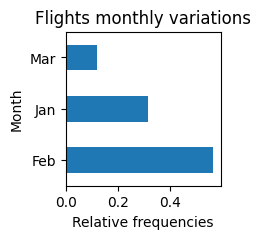

In [330]:
Month_ = pd.to_datetime(dtf.Date_of_journey.values).month
pd.Series(Month_.value_counts(normalize = True).values,index=["Feb","Jan","Mar"]).\
    plot(kind="barh",title="Flights monthly variations", figsize = [2,2], xlabel = "Relative frequencies", ylabel = "Month")

We can see that Feburary is a busy month in flights 

<Axes: title={'center': 'Flights daily variations'}, xlabel='Relative frequencies', ylabel='Journey_day'>

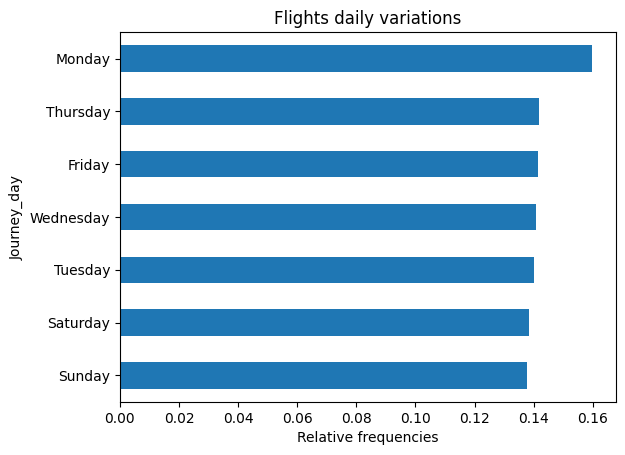

In [331]:
dtf.Journey_day.value_counts(normalize = True, ascending = True).plot(kind="barh",
 title = "Flights daily variations",xlabel = "Relative frequencies")

We can see that the precentage of the flights is pretty similar for all the days, except Monday

To ensure that our training and test sets accurately represent the daily variations observed in the dataset, where flights are evenly distributed across all seven weekdays, we will employ a stratified split based on this feature during the data partitioning process. This approach will help maintain the proportional representation of each weekday's frequencies in both the training and test sets.

### Visualization

Now we will take a look at the Histogram for each categorical attribute

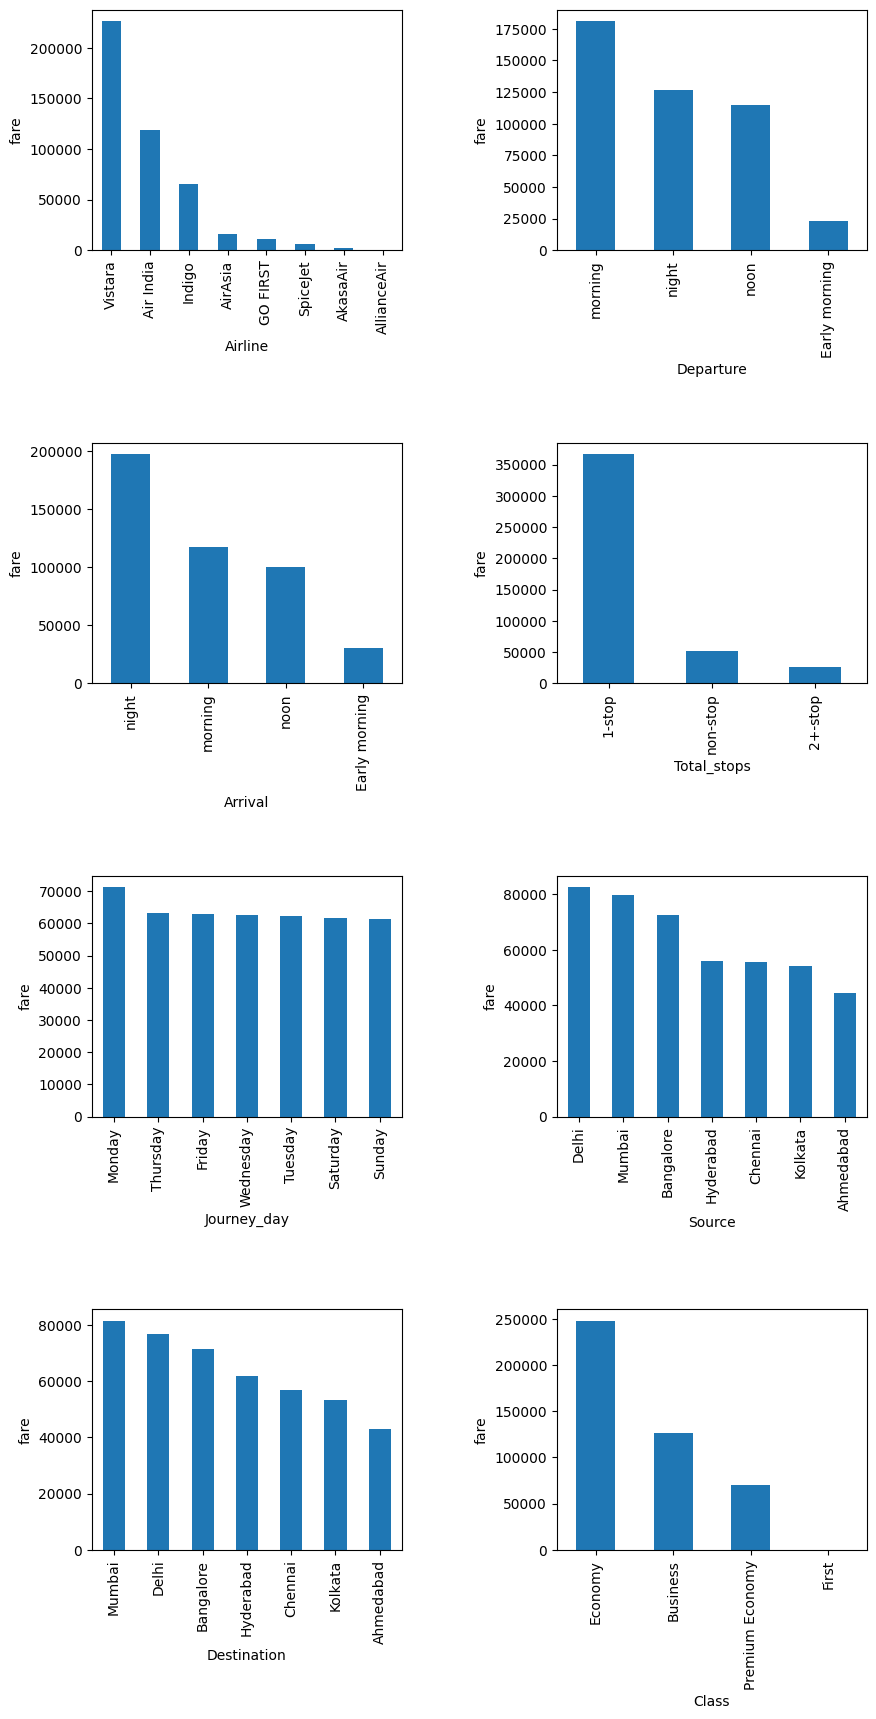

In [332]:

# Define the names of categorical columns to remove
columns_to_remove = ["Date_of_journey", "Flight_code"]

# Define the desired order of categorical columns
desired_order = ["Airline", "Departure", "Arrival", "Total_stops", "Journey_day", "Source", "Destination", "Class"]

# Filter categorical columns based on the condition and desired order
categorical_columns_filtered = [c for c in desired_order if c not in columns_to_remove]
                                
n = len(categorical_columns_filtered)
cols = 2
max_bars = 8

rows = (n // cols) + (1 if n % cols != 0 else 0)

#generate a figures grid
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.8, wspace=0.5)

for i,column in enumerate(categorical_columns_filtered):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    
    #create the "value counts" for the first <max_bars> categories
    u=min(dtf[column].nunique(),max_bars)
    vc = dtf[column].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c], xlabel = column, ylabel = "fare")


And now for the numeric attributes

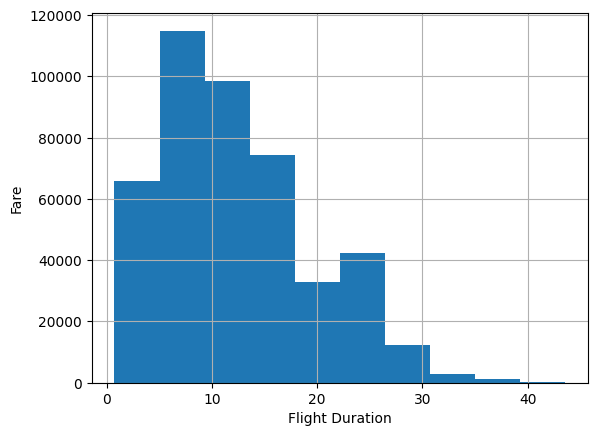

In [333]:
dtf.Duration_in_hours.hist()

# Add labels to the x and y axes
plt.xlabel('Flight Duration')
plt.ylabel('Fare')

# Show the plot
plt.show()

We can see that most expensive flights are around 10 hours.

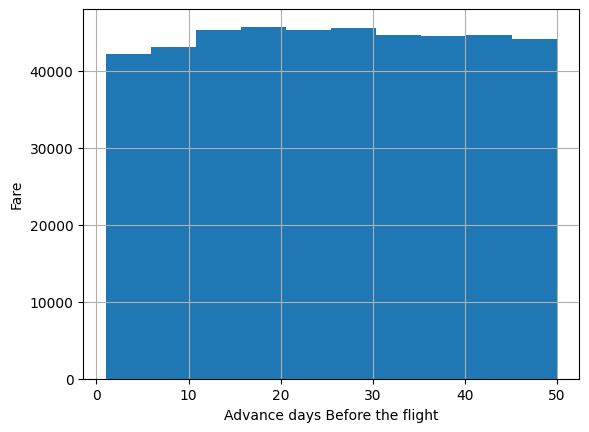

In [334]:
dtf.Advance_days.hist()

# Add labels to the x and y axes
plt.xlabel('Advance days Before the flight')
plt.ylabel('Fare')

# Show the plot
plt.show()

We can see that there is no significant meaning for booking the flight in advance.

We will examine the destinations, analyzing the flight frequencies for each part of the day

In [335]:
data = dtf.groupby("Destination")["Arrival"].value_counts()
data.head(28)

Destination  Arrival      
Ahmedabad    night            20133
             morning          12197
             noon              9773
             Early morning      927
Bangalore    night            32875
             morning          21241
             noon             12845
             Early morning     4642
Chennai      night            26399
             morning          16590
             noon             10751
             Early morning     3320
Delhi        night            29925
             noon             21786
             morning          16890
             Early morning     8157
Hyderabad    night            24154
             noon             17376
             morning          15319
             Early morning     4926
Kolkata      night            26829
             morning          16127
             noon              8356
             Early morning     2153
Mumbai       night            36657
             noon             19435
             morning          19301
 

Now, let's examine a Violin plot showcasing the fare distribution for each class

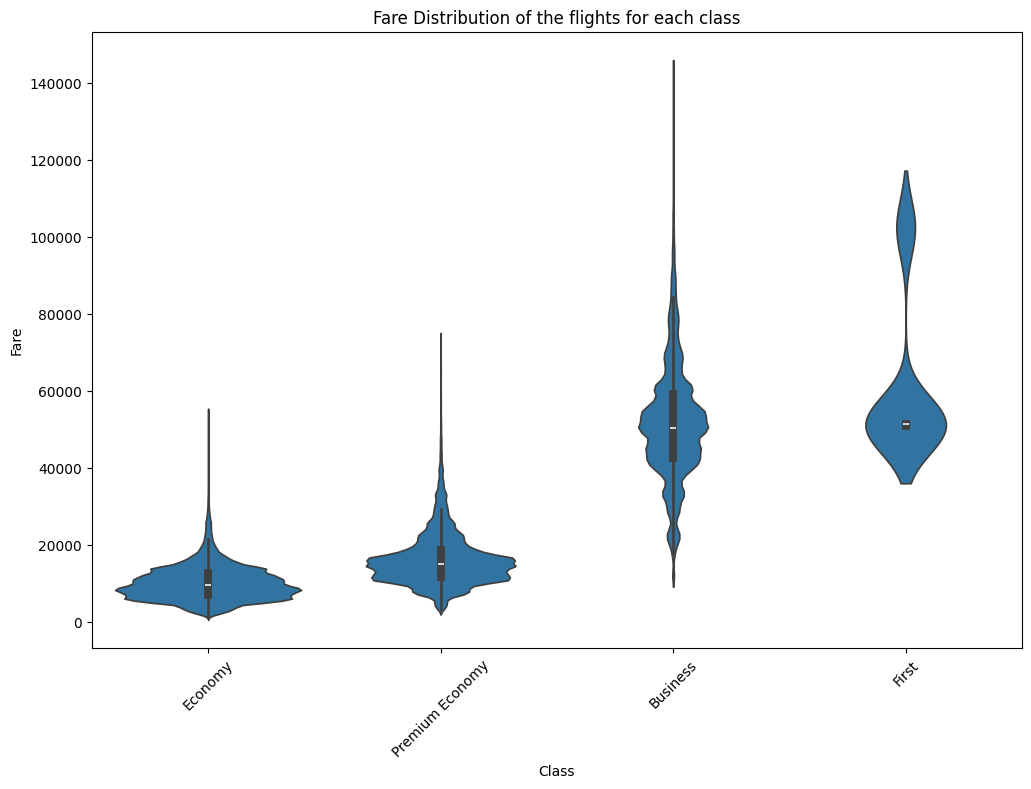

In [336]:
# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Class', y='Fare', data=dtf)
plt.title('Fare Distribution of the flights for each class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.xticks(rotation=45)
plt.show()

Using the Violin plot, we can gain insights into the distribution of flight fares across different class types:
- Economy class has an average fare of 10,000 INR, with the majority of listings falling between 5,000 INR and 15,000 INR.
- Premium Economy class has an average fare of 15,000 INR, with the majority of listings ranging from 10,000 INR to 20,000 INR.
- Business class has an average fare of 50,000 INR, with most listings falling between 40,000 INR and 60,000 INR.
- First class has an average fare of 50,000 INR, with the majority of listings between 45,000 INR and 55,000 INR. Additionally, there is another peak around 100,000 INR.
  
It's evident that Business and First class tickets are more expensive compared to Economy and Premium Economy, as expected.

### Examining Correlations to the target feature

<Axes: >

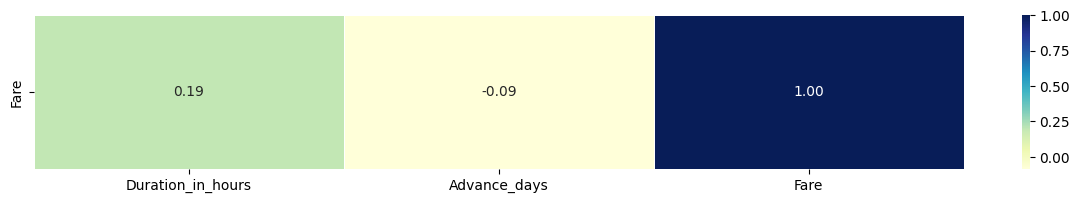

In [337]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
numeric_columns = dtf[numeric_columns]
dtf_corr = numeric_columns.corr(method="pearson").loc[["Fare"]]
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

Weak correlations were observed between fare and flight duration (0.19) as well as advance ticket purchase days (-0.09), suggesting slight trends but not conclusive associations.

### Converting categorial attributes to numeric values

In [338]:
dtf['Date_of_journey'] = pd.to_datetime(dtf['Date_of_journey'])  # Convert to datetime if not already

# Find the minimum date in the column as a reference point
min_date = dtf['Date_of_journey'].min()

# Convert the dates to numeric values representing elapsed time in days
dtf['Date_of_journey_numeric'] = (dtf['Date_of_journey'] - min_date).dt.total_seconds() / (24 * 60 * 60)  # Convert seconds to days

day_mapping = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7
}

# Map the days of the week to numeric values
dtf['Journey_day_numeric'] = dtf['Journey_day'].map(day_mapping)



**Date_of_journey ----> Date_of_journey_numeric**  
Our data is between 16/01/2023 and 06/03/2023 therefore we converted the dates in the following format:  
16/01/2023 ----> 0  
17/01/2023 ----> 1  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.  
06/03/2023 ----> 49  

**Journey_day ----> Date_of_journey_numeric**  
'Sunday' ----> 1  
'Monday' ----> 2  
'Tuesday' ----> 3  
'Wednesday' ----> 4  
'Thursday' ----> 5  
'Friday' ----> 6  
'Saturday' ----> 7  


Converting all the other categorial attributes by a LabelEncoder function

In [339]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Airline', 'Flight_code', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']:
    dtf[col] = label_encoder.fit_transform(dtf[col])

# Drop original datetime and object columns
dtf.drop(columns=['Date_of_journey', 'Journey_day'], inplace=True)

print(dtf)


        Airline  Flight_code  Class  Source  Departure  Total_stops  Arrival  \
0             6         1209      1       3          2            2        2   
1             5          164      1       3          2            2        0   
2             4          942      1       3          2            2        0   
3             6         1224      1       3          2            2        2   
4             0          852      1       3          2            2        2   
...         ...          ...    ...     ...        ...          ...      ...   
452081        8         1358      0       0          0            0        3   
452082        8         1374      0       0          1            0        2   
452083        8         1360      0       0          1            0        2   
452084        8         1358      0       0          0            0        3   
452086        8         1374      0       0          1            0        2   

        Destination  Duration_in_hours 

<Axes: >

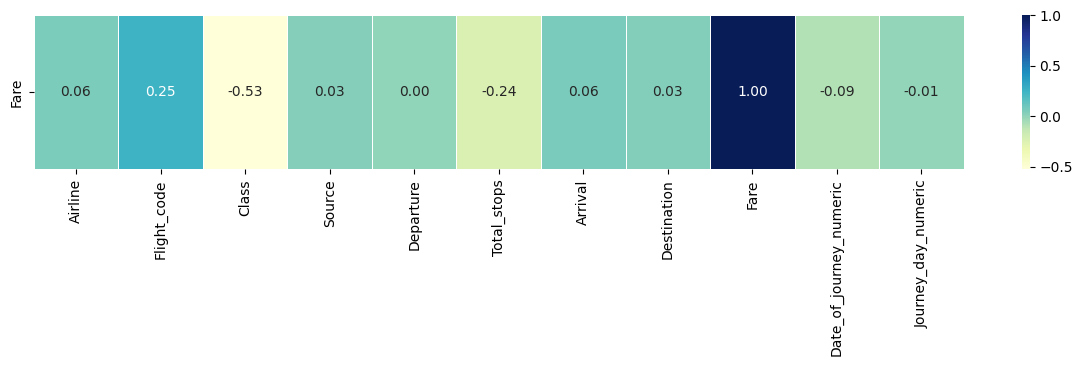

In [340]:
columns_checked = ["Duration_in_hours","Advance_days"]
columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
columns = [c for c in columns if c not in columns_checked]
columns = dtf[columns]
dtf_corr = columns.corr(method="pearson").loc[["Fare"]]
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

## Baseline Model

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

In [342]:
# We will split the dataset into features and target variables. The target variable is the fare, and all the others are the features.
# Our predictors
X = dtf.drop(columns = 'Fare')

# Our outcome variable
y = dtf.Fare

We will split the data to test and training sets with stratified method based on the daily variation of flights with shaffle before split.

In [343]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=dtf["Journey_day_numeric"], random_state=42, shuffle = True)

In [344]:
# Train XGBoost as a baseline model for our pipeline
baseline_model = xgb.XGBRegressor(objective="reg:squarederror")
baseline_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [345]:
y_pred = baseline_model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.9497002678020673


A R-squared (R²) score of 0.9497 indicates that approximately 94.97% of the variance in the dependent variable (target variable) is explained by the independent variables (predictors) in your regression model.

In [346]:
print("Mean Absolute Perc Error:","{:,.3f}".format(mean_absolute_percentage_error(y_test,y_pred)))
print("Mean Absolute Error:", "{:,.0f}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error:", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

## residuals
residuals = y_test - y_pred
max_error = residuals.abs().max()
max_idx = residuals[residuals==max_error].index[0]
#max_true, max_pred = y_test.loc[max_idx], prediction[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error: 0.139
Mean Absolute Error: 2,663
Root Mean Squared Error: 4,572
Max Error: 50,331


We now plot the true values against the predicted values.

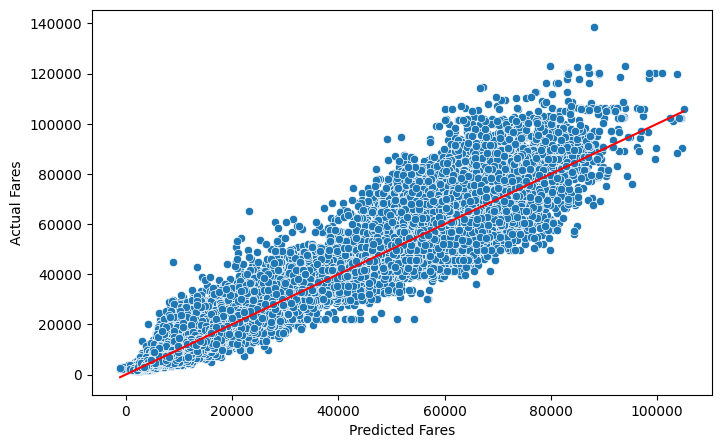

In [347]:
# print the predicted fares regression plot
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=y_pred,y=y_test,ax=ax)
sns.lineplot(x=y_pred,y=y_pred,ax=ax,color='red')
ax.set_xlabel('Predicted Fares')
ax.set_ylabel('Actual Fares')

plt.show()

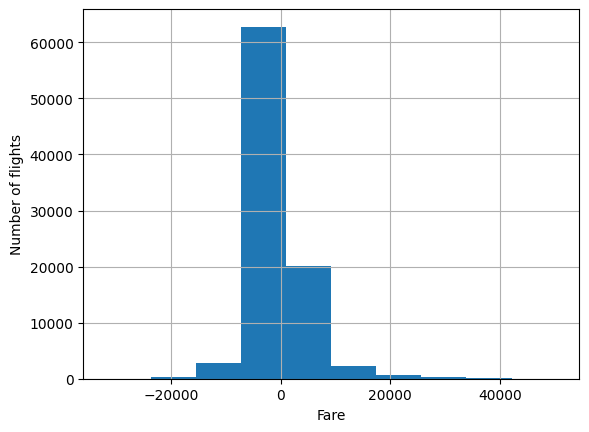

In [348]:
residuals.hist()
# Add labels to the x and y axes
plt.xlabel('Fare')
plt.ylabel('Number of flights')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Residuals (%)')

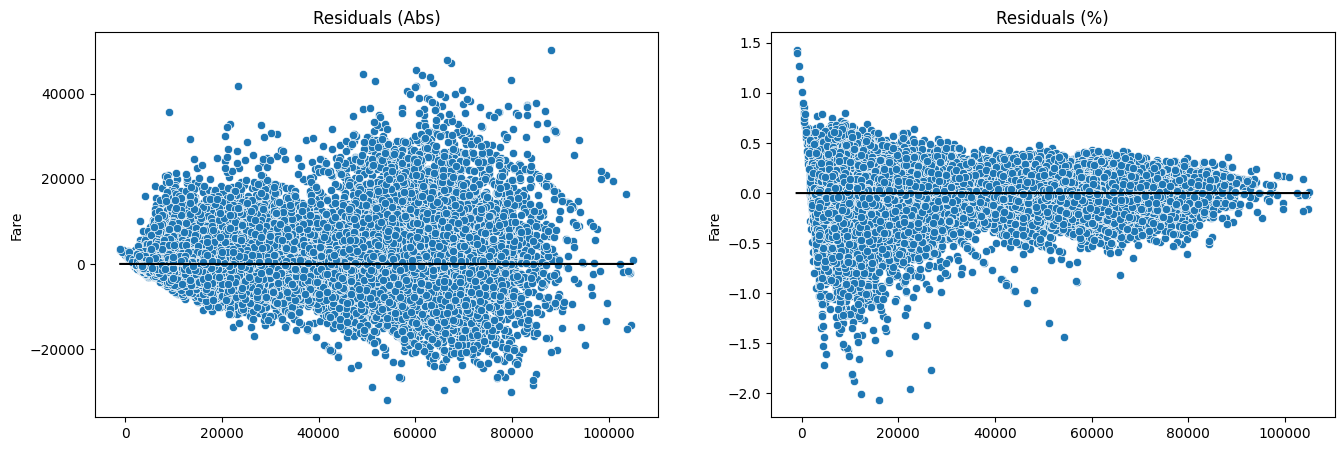

In [308]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(x=y_pred, y=residuals, ax=ax[0])
sns.lineplot(x=y_pred, y=0, ax=ax[0], color='black')
ax[0].set_title("Residuals (Abs)")
sns.scatterplot(x=y_pred,y=residuals/y_test,ax=ax[1])
sns.lineplot(x=y_pred,y=0,ax=ax[1],color='black')
ax[1].set_title("Residuals (%)")

We can see that we have some big mistakes and some small mistakes

In [309]:
rel_res=residuals/y_test
rel_res=rel_res.abs()

How many time did our model achieve low estimation error (error less than 5%)?

In [310]:
len(rel_res[rel_res<0.05])/len(rel_res)

0.2984933875204886

How many time did our model achieve low estimation error (error more than 20%)?:

In [311]:
len(rel_res[rel_res>0.2])/len(rel_res)

0.23281765722882097

## Results

The baseline model has a Mean Absolute Error of 2,663 and an R2 score of ~0.9497, which looks almost like a perfect fit for our model.  
The regression plot shows that the predicted fares are close to the actual fares, and the residuals distribution plot shows that the residuals are normally distributed around 0.
We can see that in the residuals histogram most of the residuals are around 0, which means the prediction is pretty accurate.
we can see that there are more low estimators than high.